# Examining Racial Discrimination in the US Job Market

### Background
Racial discrimination continues to be pervasive in cultures throughout the world. Researchers examined the level of racial discrimination in the United States labor market by randomly assigning identical résumés to black-sounding or white-sounding names and observing the impact on requests for interviews from employers.

### Data
In the dataset provided, each row represents a resume. The 'race' column has two values, 'b' and 'w', indicating black-sounding and white-sounding. The column 'call' has two values, 1 and 0, indicating whether the resume received a call from employers or not.

Note that the 'b' and 'w' values in race are assigned randomly to the resumes when presented to the employer.

### Exercises
You will perform a statistical analysis to establish whether race has a significant impact on the rate of callbacks for resumes.

Answer the following questions **in this notebook below and submit to your Github account**. 

   1. What test is appropriate for this problem? Does CLT apply?
   2. What are the null and alternate hypotheses?
   3. Compute margin of error, confidence interval, and p-value. Try using both the bootstrapping and the frequentist statistical approaches.
   4. Write a story describing the statistical significance in the context or the original problem.
   5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources
+ Experiment information and data source: http://www.povertyactionlab.org/evaluation/discrimination-job-market-united-states
+ Scipy statistical methods: http://docs.scipy.org/doc/scipy/reference/stats.html 
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
+ Formulas for the Bernoulli distribution: https://en.wikipedia.org/wiki/Bernoulli_distribution

In [24]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

In [20]:
data = pd.io.stata.read_stata('data/us_job_market_discrimination.dta')

In [21]:
# number of callbacks for black-sounding names
sum(data[data.race=='b'].call)

157.0

In [22]:
data.head()

,id,ad,education,ofjobs,yearsexp,honors,volunteer,military,empholes,occupspecific,...,compreq,orgreq,manuf,transcom,bankreal,trade,busservice,othservice,missind,ownership
0,b,1,4,2,6,0,0,0,1,17,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
1,b,1,3,3,6,0,1,1,0,316,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
2,b,1,4,1,6,0,0,0,0,19,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
3,b,1,3,4,6,0,1,0,1,313,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
4,b,1,3,3,22,0,0,0,0,313,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Nonprofit


In [23]:
data.columns

Index(['id', 'ad', 'education', 'ofjobs', 'yearsexp', 'honors', 'volunteer',
       'military', 'empholes', 'occupspecific', 'occupbroad', 'workinschool',
       'email', 'computerskills', 'specialskills', 'firstname', 'sex', 'race',
       'h', 'l', 'call', 'city', 'kind', 'adid', 'fracblack', 'fracwhite',
       'lmedhhinc', 'fracdropout', 'fraccolp', 'linc', 'col', 'expminreq',
       'schoolreq', 'eoe', 'parent_sales', 'parent_emp', 'branch_sales',
       'branch_emp', 'fed', 'fracblack_empzip', 'fracwhite_empzip',
       'lmedhhinc_empzip', 'fracdropout_empzip', 'fraccolp_empzip',
       'linc_empzip', 'manager', 'supervisor', 'secretary', 'offsupport',
       'salesrep', 'retailsales', 'req', 'expreq', 'comreq', 'educreq',
       'compreq', 'orgreq', 'manuf', 'transcom', 'bankreal', 'trade',
       'busservice', 'othservice', 'missind', 'ownership'],
      dtype='object')

# 1. What test is appropriate for this problem? Does CLT apply?

Here we are comparing two means to see if they are equal, hence we would use the two-sample test. 

# 2. What are the null and alternate hypotheses?

Null hypothesis: Mean proportion white callbacks = Mean proportion black callbacks

Alternate Hypothesis: Mean proportion white callbacks > Mean proportion black callbacks

Alpha = 0.05

<div class="span5 alert alert-success">
<p>Your answers to Q1 and Q2 here</p>
</div>

In [6]:
w = data[data.race=='w']
b = data[data.race=='b']

In [8]:
w_callback_rate = np.sum(w['call']) / len(w['call'])
print(w_callback_rate)

0.09650924024640657


In [10]:
b_callback_rate = np.sum(b['call']) / len(b['call'])
print(b_callback_rate)

0.06447638603696099


In [11]:
# Define a function that returns the proportion of call-backs in a set of data
def proportion_calc(data):
    return np.sum(data) / len(data)

In [12]:
proportion_calc(b['call'])

0.06447638603696099

In [13]:
# This function takes a set of data and a function
# It applies that function to a bootstrap sample of the data
def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))

In [14]:
def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates"""
    
    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)
    
    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)
        
    return bs_replicates

0.0059840016981803105
0.005943224051681227


<function matplotlib.pyplot.show(*args, **kw)>

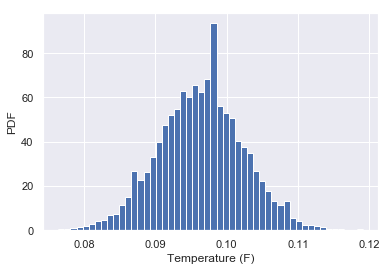

In [37]:
# Take 10,000 bootstrap replicates of the mean
bs_replicates = draw_bs_reps(w['call'], proportion_calc, size=10000)

# Compute and print Standard Error of the Mean (SEM)
sem = np.std(w['call']) / np.sqrt(len(w['call']))

print(sem)

# Compute and print the standard deviation of the bootstrap replicates
bs_std = np.std(bs_replicates)
print(bs_std)

# Make a histogram of the results
_ = plt.hist(bs_replicates, bins=50, density=True)
_ = plt.xlabel("Temperature (F)")
_ = plt.ylabel("PDF")

# Show the plot
plt.show

<div class="span5 alert alert-success">
<p> Your answers to Q4 and Q5 here </p>
</div>